# Prasham Titiya - 20BAI1307
# CSE 1016 - Lab 6- Autoencoders

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import medmnist
from medmnist import INFO, Evaluator
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Lambda,BatchNormalization
from keras import Input, Model
import matplotlib.pyplot as plt

## Loading Data

In [2]:
data = np.load('pneumoniamnist.npz')
lst = data.files
for item in lst:
    print(item)

train_images
val_images
test_images
train_labels
val_labels
test_labels


In [3]:
print(data['train_images'])

[[[ 92 108 117 ...   5   8   6]
  [129 138 141 ...   4   2   3]
  [141 146 148 ...   0   0   0]
  ...
  [168 180 192 ... 119 115 126]
  [173 184 195 ... 153 139 132]
  [173 185 198 ... 168 154 139]]

 [[115 118 117 ... 123 115 104]
  [130 137 140 ... 146 135 121]
  [134 151 167 ... 152 138 123]
  ...
  [176 180 187 ... 169 151 142]
  [181 185 192 ... 173 163 158]
  [184 189 195 ... 183 176 169]]

 [[149 146 147 ... 128 141 151]
  [171 153 147 ... 149 159 166]
  [172 166 167 ... 162 170 172]
  ...
  [ 95 133 174 ... 159 118 150]
  [139 166 196 ... 185 147 150]
  [181 184 191 ... 188 169 157]]

 ...

 [[ 86  97 103 ...  53  44  44]
  [ 88 102 116 ...  57  46  46]
  [ 96 106 125 ...  74  60  58]
  ...
  [ 43  58  81 ... 147 139 132]
  [ 90 106 127 ... 148 138 130]
  [132 142 153 ... 145 136 129]]

 [[ 14   0   0 ...  96  95  99]
  [ 66  56  65 ... 119 115 118]
  [ 92  91 106 ... 128 123 127]
  ...
  [143 142 154 ... 121 102 130]
  [145 154 165 ...  97 108 139]
  [129 149 165 ...  71 104 1

In [4]:
print(data['train_labels'])

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [5]:
data['train_images'].shape

(4708, 28, 28)

In [6]:
train_data = data['train_images'] / 255.0
test_data = data['test_images'] / 255.0

In [7]:
train_data.shape

(4708, 28, 28)

In [8]:
data['test_images'].shape

(624, 28, 28)

In [9]:
xtrain=np.reshape(train_data,(4708,784))
xtest=np.reshape(test_data,(624,784))

In [10]:
xtrain.shape

(4708, 784)

## PCA

In [11]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='linear')(input_img)
decoded = Dense(784, activation='linear')(encoded)
pcaautoencoder = Model(input_img, decoded)

In [12]:
pcaencoder = Model(input_img, encoded)
encoded_input = Input(shape=(64,))
decoder_layer = pcaautoencoder.layers[-1]
pcadecoder = Model(encoded_input, decoder_layer(encoded_input))

In [13]:
pcaautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
pca=pcaautoencoder.fit(xtrain, xtrain,
                epochs=6,
                batch_size=32,
                validation_data=(xtest, xtest),
                verbose=0)

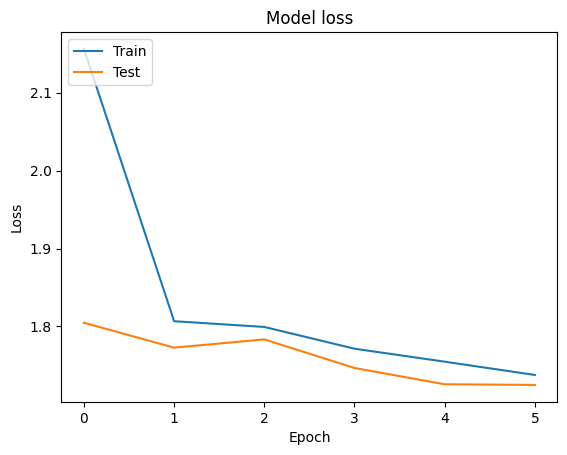

In [15]:
plt.plot(pca.history['loss']) 
plt.plot(pca.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
pcaautoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [17]:
pcaencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [18]:
pcadecoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


20/20 [==============================] - 0s 2ms/step


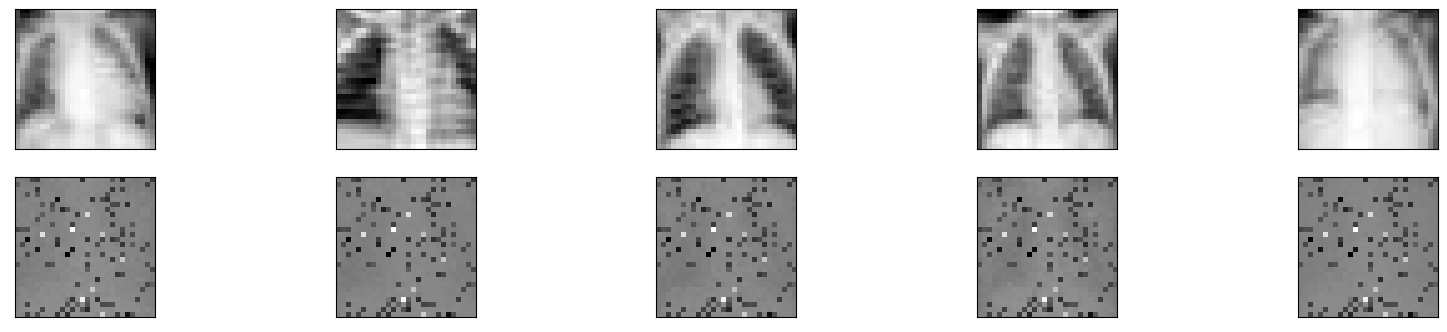

In [19]:
encoded_img = pcaencoder.predict(xtest)
decoded_img = pcadecoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 2ms/step


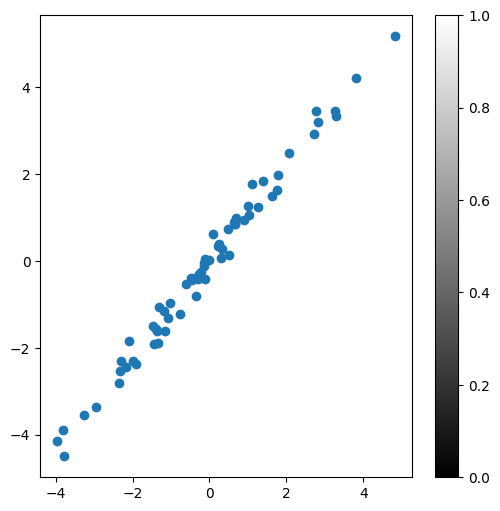

In [20]:
x_test_encoded = pcaencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

## Vanilla

In [21]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
vanautoencoder = Model(input_img, decoded)

In [22]:
vanencoder = Model(input_img, encoded)
encoded_input = Input(shape=(64,))
decoder_layer = vanautoencoder.layers[-1]
vandecoder = Model(encoded_input, decoder_layer(encoded_input))

In [23]:
vanautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
van=vanautoencoder.fit(xtrain, xtrain,
                epochs=200,
                batch_size=32,
                validation_data=(xtest, xtest),
                verbose=0)

In [25]:
vanautoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [26]:
vanencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [27]:
vandecoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


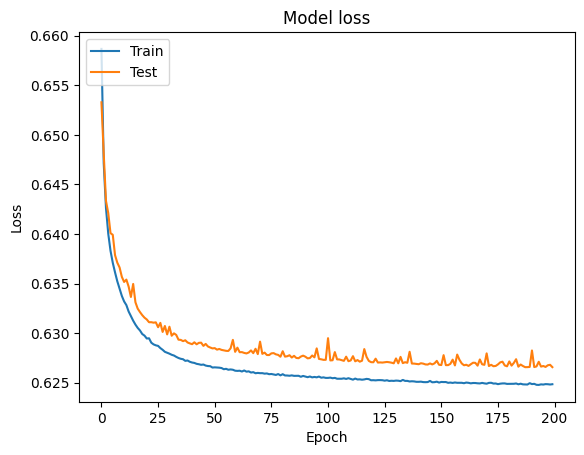

In [28]:
plt.plot(van.history['loss']) 
plt.plot(van.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 2ms/step


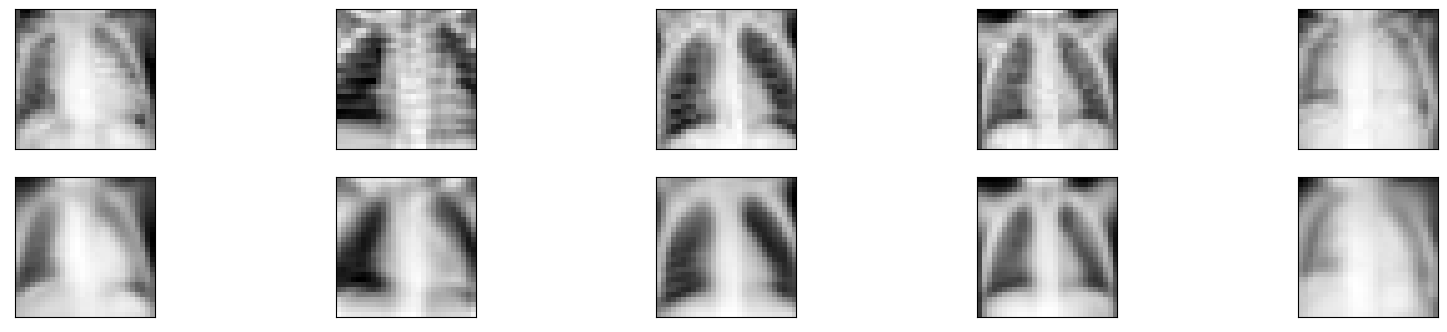

In [29]:
encoded_img = vanencoder.predict(xtest)
decoded_img = vandecoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 2ms/step


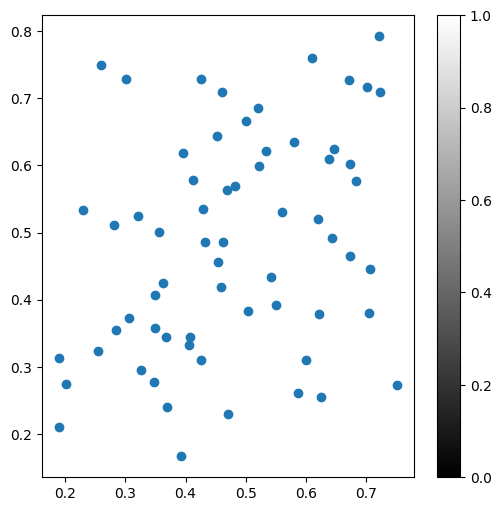

In [30]:
x_test_encoded = vanencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

## Multilayer

In [31]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='sigmoid')(input_img)
encoded = Dense(32, activation='sigmoid')(encoded)
decoded = Dense(32, activation='sigmoid')(encoded)
decoded = Dense(64, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
mulautoencoder = Model(input_img, decoded)

mulencoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))
decoder_layer = mulautoencoder.layers[-2]
decoder_layer1 = mulautoencoder.layers[-1]
muldecoder = Model(encoded_input,decoder_layer1(decoder_layer(encoded_input)))

In [32]:
mulautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [33]:
mul=mulautoencoder.fit(xtrain, xtrain,
                epochs=200,
                batch_size=32,
                validation_data=(xtest, xtest),
                verbose=0)

In [34]:
mulautoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 784)               50960     
                                                                 
Total params: 106,448
Trainable params: 106,448
Non-trainab

In [35]:
mulencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
Total params: 52,320
Trainable params: 52,320
Non-trainable params: 0
_________________________________________________________________


In [36]:
muldecoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 784)               50960     
                                                                 
Total params: 53,072
Trainable params: 53,072
Non-trainable params: 0
_________________________________________________________________


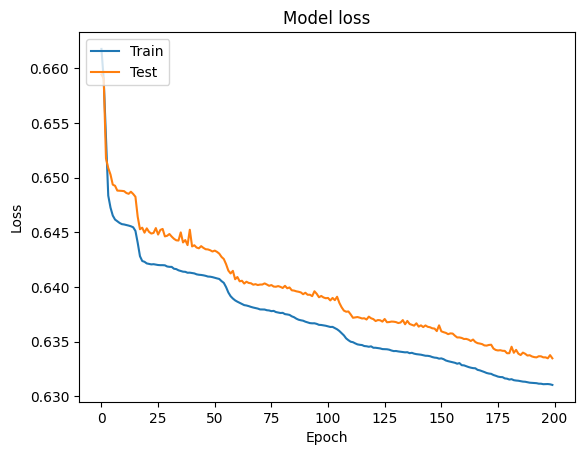

In [37]:
plt.plot(mul.history['loss']) 
plt.plot(mul.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 2ms/step


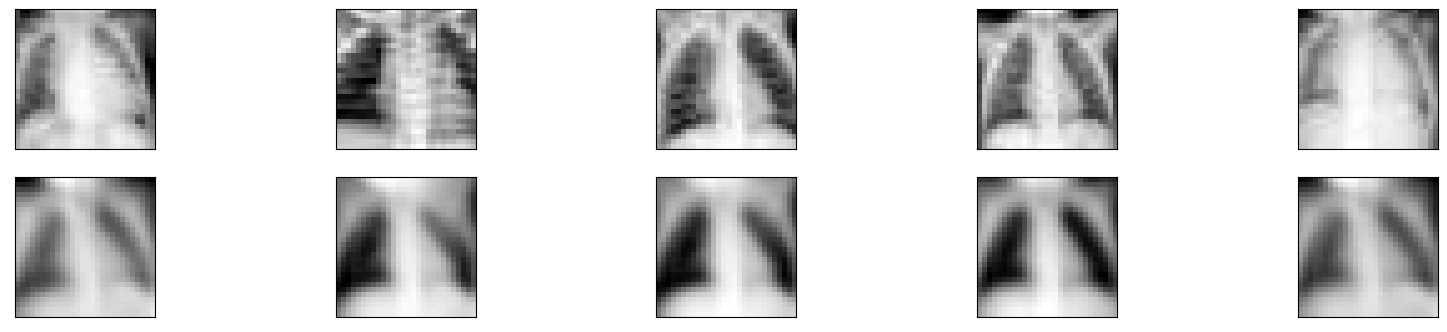

In [38]:
encoded_img = mulencoder.predict(xtest)
decoded_img = muldecoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 2ms/step


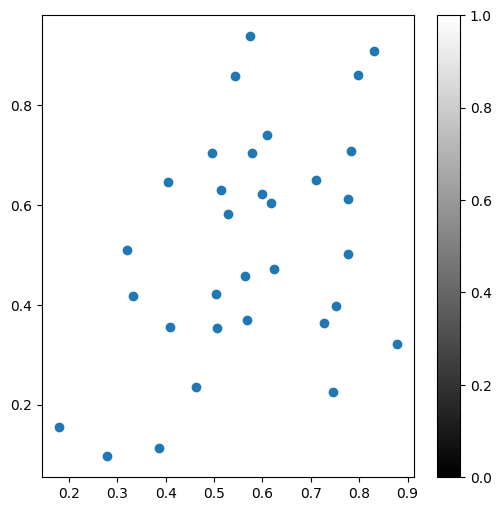

In [39]:
x_test_encoded = mulencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

## Regularized

In [40]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.001))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
regautoencoder = Model(input_img, decoded)
regencoder = Model(input_img, encoded)
encoded_input = Input(shape=(64,))
decoder_layer = regautoencoder.layers[-1]
regdecoder = Model(encoded_input, decoder_layer(encoded_input))

In [41]:
regautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [42]:
reg=regautoencoder.fit(xtrain, xtrain,
                epochs=200,
                batch_size=32,
                validation_data=(xtest, xtest),
                verbose=0)

In [43]:
regautoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [44]:
regencoder.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [45]:
regdecoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_10 (Dense)            (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


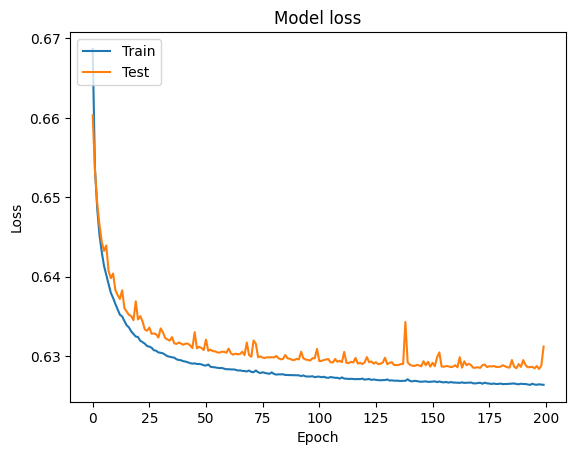

In [46]:
plt.plot(reg.history['loss']) 
plt.plot(reg.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 2ms/step


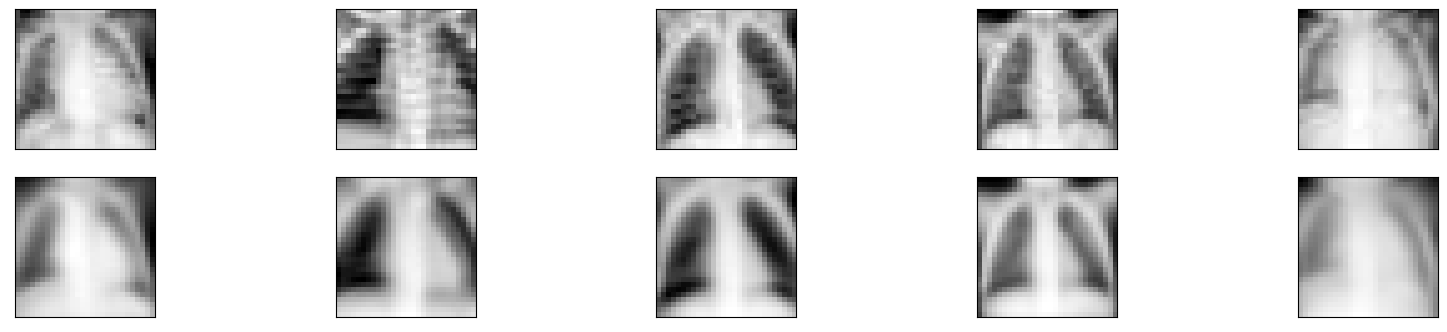

In [47]:
encoded_img = regencoder.predict(xtest)
decoded_img = regdecoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 2ms/step


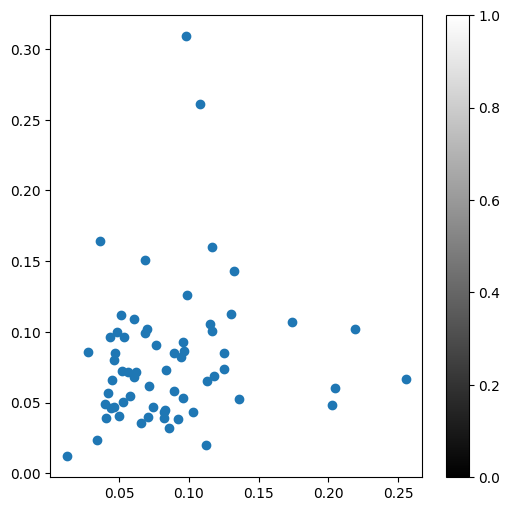

In [48]:
x_test_encoded = regencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

## Convolution

In [49]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.ReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(8, (3, 3), padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.ReLU()(x)

encoder = BatchNormalization()(x)

In [50]:
convencoder=Model(input_img,encoder)

In [51]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(8, (3, 3), padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.ReLU()(x)

encoder = BatchNormalization()(x)
dec = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(dec)
x = keras.layers.ReLU()(x)
x = BatchNormalization()(x)

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = keras.layers.ReLU()(x)

decoder = BatchNormalization()(x)
convdecoder=Model(dec, decoder)

In [52]:
convautoencoder = Model(input_img, decoder)
convautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [53]:
conv=convautoencoder.fit(train_data, train_data,
                epochs=50,
                batch_size=32,
                validation_data=(test_data, test_data),
                verbose=0)

In [54]:
convautoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0  

In [55]:
convencoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 14, 14, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         116

In [56]:
convdecoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7, 7, 8)]         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 re_lu_3 (ReLU)              (None, 14, 14, 8)         0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 8)        32        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 1)         73        
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 1)        0  

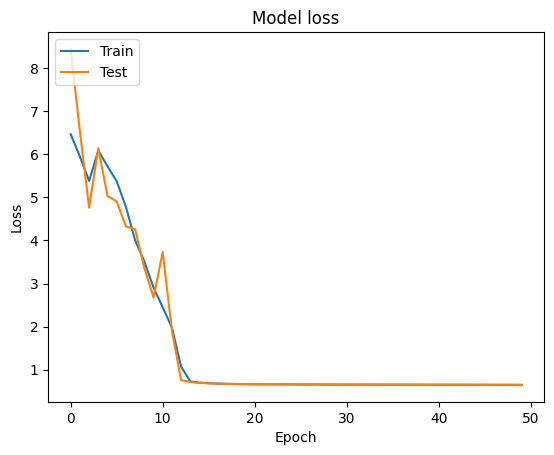

In [57]:
plt.plot(conv.history['loss']) 
plt.plot(conv.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 4ms/step


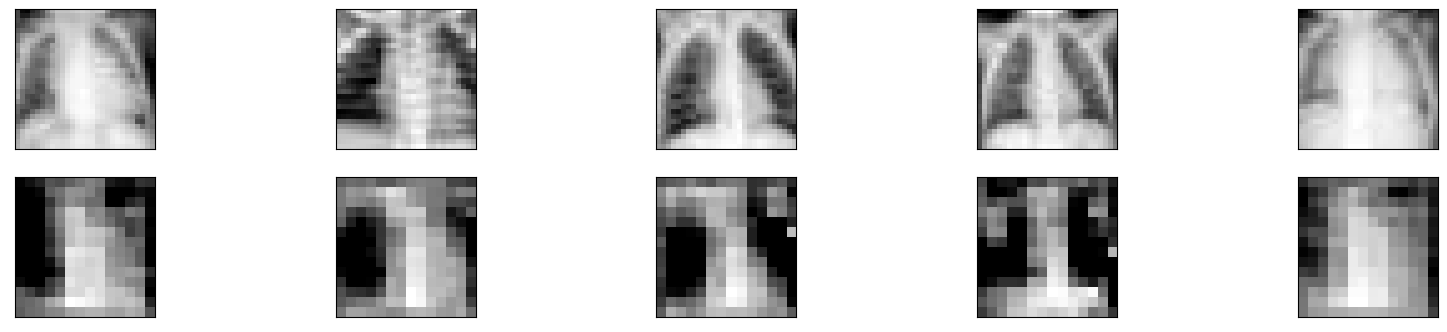

In [58]:
pred = convautoencoder.predict(test_data)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 3ms/step


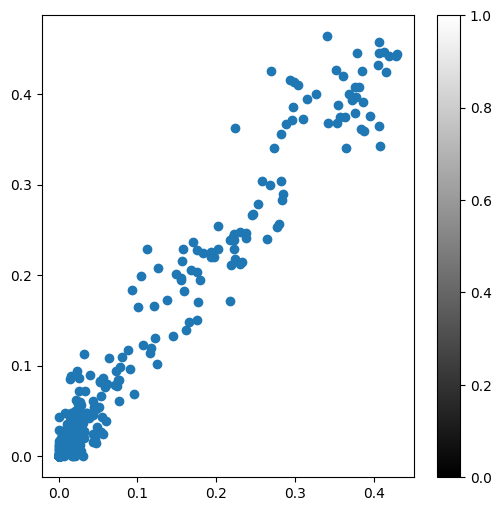

In [59]:
x_test_encoded = convencoder.predict(test_data, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

## Denoising

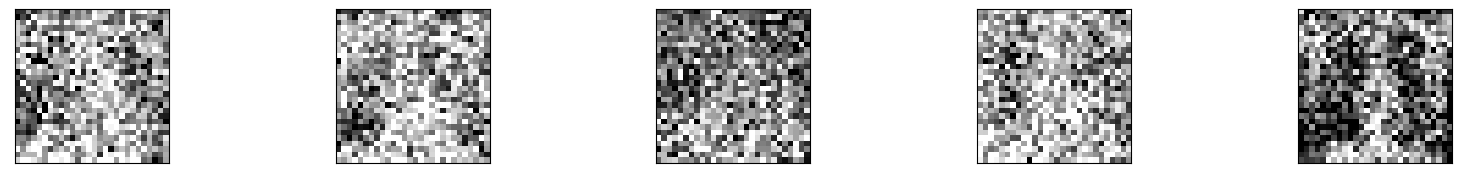

In [60]:
noise_factor = 0.3
train_noisy = train_data + noise_factor * np.random.normal(size=train_data.shape) 
test_noisy = test_data + noise_factor * np.random.normal(size=test_data.shape) 
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [61]:
denoisencoder=convencoder
denoisedecoder=convdecoder

In [62]:
denoiseautoencoder = Model(input_img, decoder)
denoiseautoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [63]:
denoise=denoiseautoencoder.fit(train_noisy, train_data,
                epochs=50,
                batch_size=32,
                validation_data=(test_noisy, test_data),
                verbose=0)

In [64]:
denoiseautoencoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0  

In [65]:
denoisencoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 14, 14, 16)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         116

In [66]:
denoisedecoder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7, 7, 8)]         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 re_lu_3 (ReLU)              (None, 14, 14, 8)         0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 8)        32        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 1)         73        
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 1)        0  

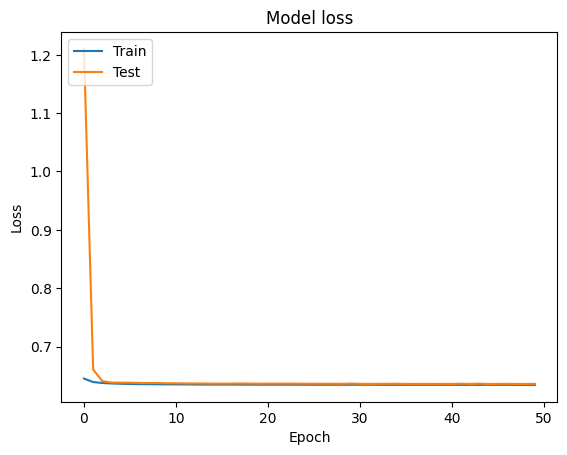

In [67]:
plt.plot(denoise.history['loss']) 
plt.plot(denoise.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 5ms/step


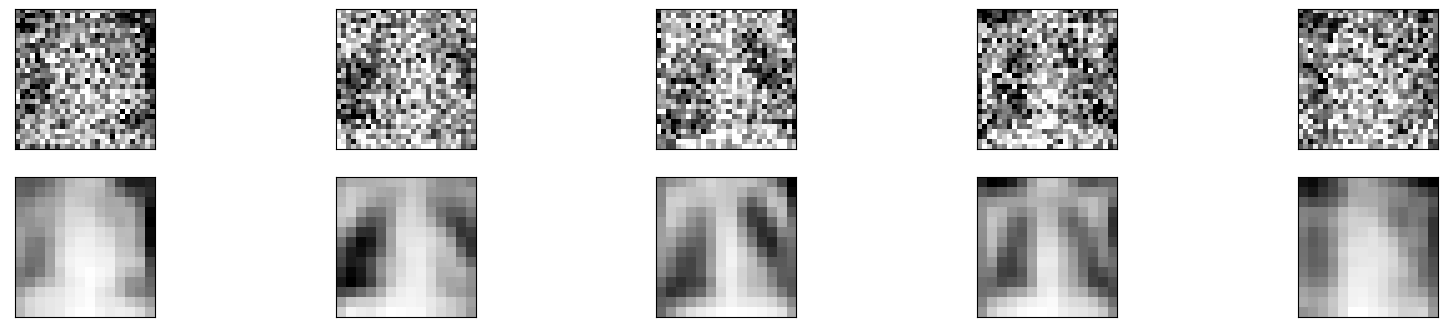

In [68]:
pred = denoiseautoencoder.predict(test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 4ms/step


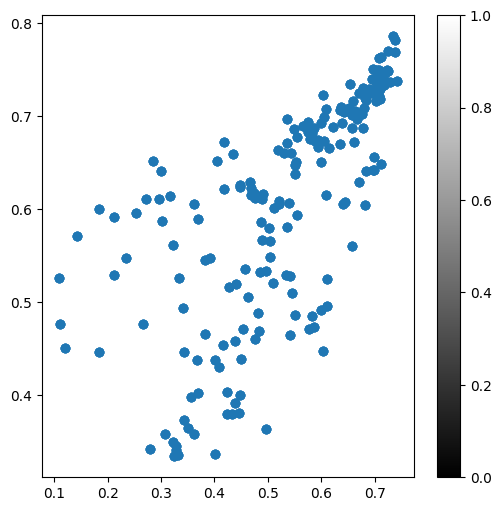

In [69]:
x_test_encoded = denoiseautoencoder.predict(test_data, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

## Variational

In [70]:
latent_dim = 2

inputs = Input(shape=(784,))
h = Dense(64, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [71]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

In [72]:
z = Lambda(sampling)([z_mean, z_log_sigma])

In [73]:
varencoder = Model(inputs, [z_mean, z_log_sigma, z])

latent_inputs = Input(shape=(latent_dim,))
x = Dense(64, activation='relu')(latent_inputs)
outputs = Dense(784, activation='sigmoid')(x)
vardecoder = Model(latent_inputs, outputs)

outputs = vardecoder(varencoder(inputs)[2])
varautoencoder = Model(inputs, outputs)

In [74]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= 784
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
varautoencoder.add_loss(vae_loss)
varautoencoder.compile(optimizer='adam')

In [75]:
varautoencoder.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 model_16 (Functional)          [(None, 2),          50500       ['input_12[0][0]']               
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 model_17 (Functional)          (None, 784)          51152       ['model_16[0][2]']               
                                                                                           

In [76]:
varencoder.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 64)           50240       ['input_12[0][0]']               
                                                                                                  
 dense_12 (Dense)               (None, 2)            130         ['dense_11[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 2)            130         ['dense_11[0][0]']               
                                                                                           

In [77]:
vardecoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_14 (Dense)            (None, 64)                192       
                                                                 
 dense_15 (Dense)            (None, 784)               50960     
                                                                 
Total params: 51,152
Trainable params: 51,152
Non-trainable params: 0
_________________________________________________________________


In [78]:
vae=varautoencoder.fit(xtrain, xtrain,
                epochs=200,
                batch_size=32,
                validation_data=(xtest, xtest),
                verbose=0)

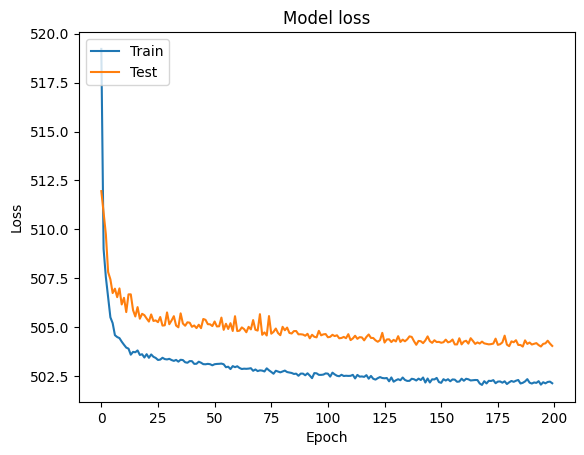

In [79]:
plt.plot(vae.history['loss']) 
plt.plot(vae.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 3ms/step


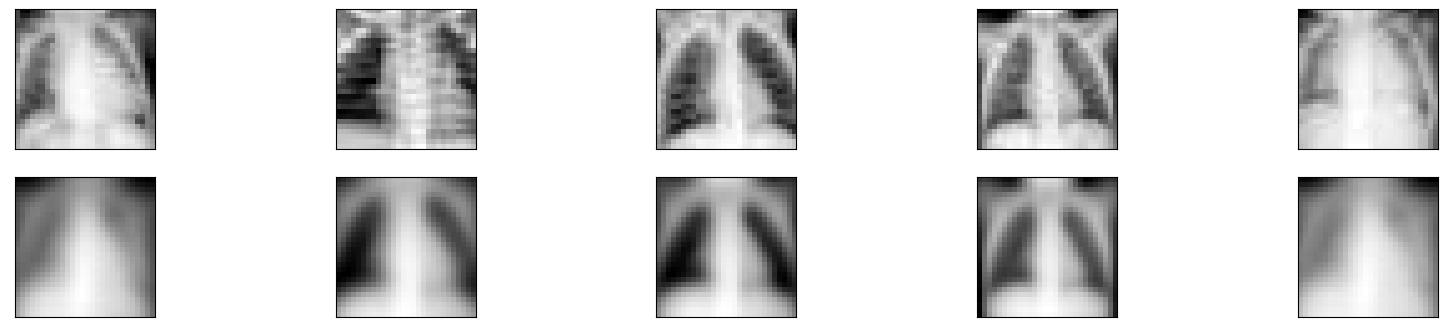

In [80]:
pred = varautoencoder.predict(xtest)
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Latent Space

20/20 [==============================] - 0s 2ms/step


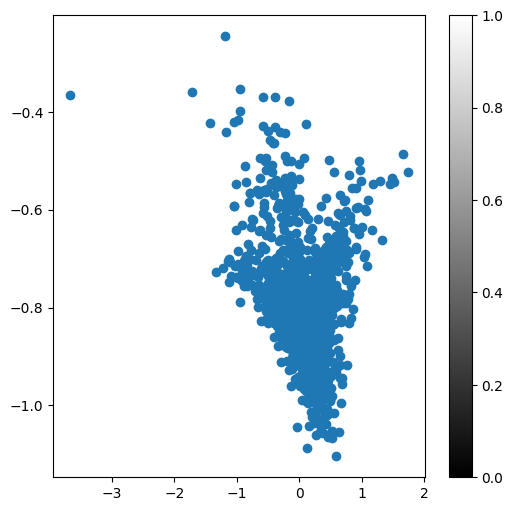

In [81]:
x_test_encoded = varencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[1])
plt.colorbar()
plt.show()

20/20 [==============================] - 0s 3ms/step


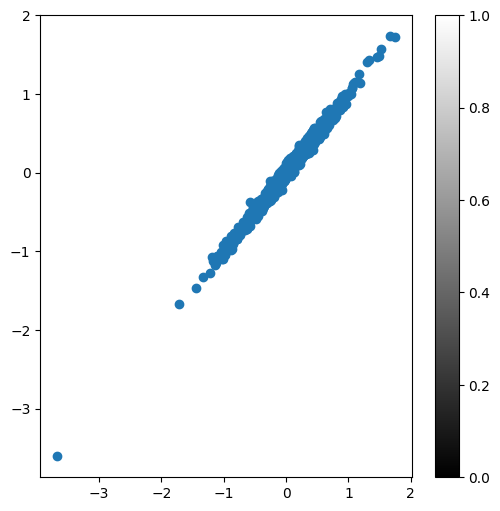

In [82]:
x_test_encoded = varencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0], x_test_encoded[2])
plt.colorbar()
plt.show()

20/20 [==============================] - 0s 2ms/step


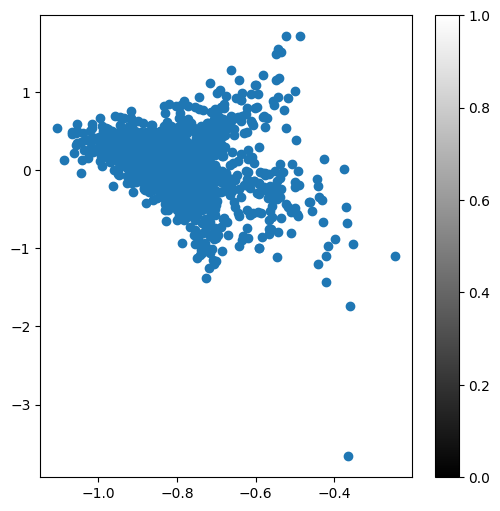

In [83]:
x_test_encoded = varencoder.predict(xtest, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[1], x_test_encoded[2])
plt.colorbar()
plt.show()

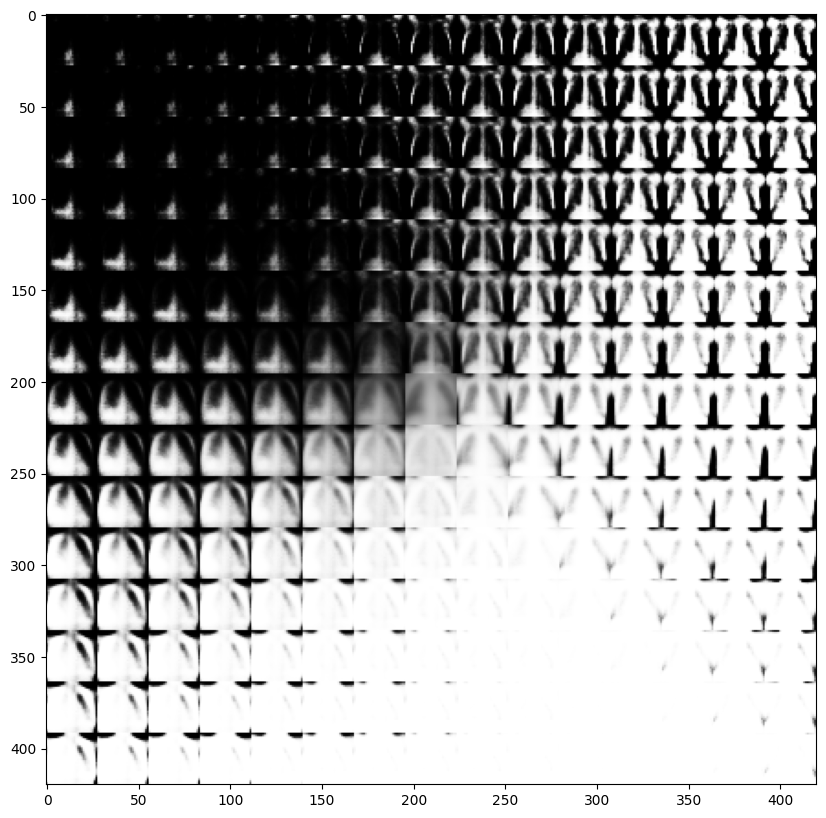

In [84]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = vardecoder.predict(z_sample,verbose=0)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()